In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
parse_dates = ['date']

rawData = pd.read_csv('weather_brunico.csv', delimiter= ';', parse_dates=parse_dates)
rawData.dtypes

date             datetime64[ns]
precipitation           float64
minTemp                  object
maxTemp                  object
dtype: object

In [3]:
df = rawData.copy()
df['minTemp'] = pd.to_numeric(rawData.minTemp, errors='coerce')
df['maxTemp'] = pd.to_numeric(rawData.maxTemp, errors='coerce')

# use data untill 2019
df = df[(df['date'] < datetime.datetime(2019, 1, 1))]
df

,date,precipitation,minTemp,maxTemp
0,1986-01-01,0.4,-1.0,-4.0
1,1986-02-01,0.8,-2.0,-4.0
2,1986-03-01,0.2,0.0,-5.0
3,1986-04-01,0.0,0.0,-12.0
4,1986-05-01,0.0,-4.0,-16.0
...,...,...,...,...
12048,2018-12-27,0.0,3.3,-9.1
12049,2018-12-28,0.0,3.0,-6.1
12050,2018-12-29,0.0,4.8,-7.5
12051,2018-12-30,0.0,2.7,-5.2


In [4]:
df['avg'] = df[['minTemp', 'maxTemp']].mean(axis=1)
df

,date,precipitation,minTemp,maxTemp,avg
0,1986-01-01,0.4,-1.0,-4.0,-2.50
1,1986-02-01,0.8,-2.0,-4.0,-3.00
2,1986-03-01,0.2,0.0,-5.0,-2.50
3,1986-04-01,0.0,0.0,-12.0,-6.00
4,1986-05-01,0.0,-4.0,-16.0,-10.00
...,...,...,...,...,...
12048,2018-12-27,0.0,3.3,-9.1,-2.90
12049,2018-12-28,0.0,3.0,-6.1,-1.55
12050,2018-12-29,0.0,4.8,-7.5,-1.35
12051,2018-12-30,0.0,2.7,-5.2,-1.25


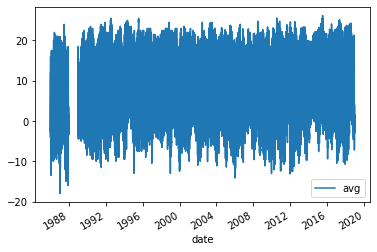

In [20]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='date',y='avg',ax=ax)
plt.show()

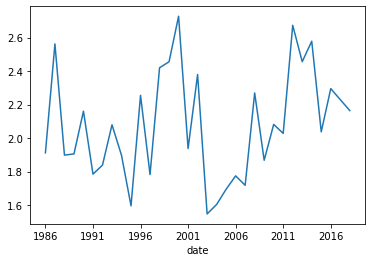

In [23]:
gbm = df.groupby([df['date'].dt.strftime('%Y')])[''].mean()
# gca stands for 'get current axis'
ax = plt.gca()

gbm.plot(kind='line',x='date',y='avg',ax=ax)
plt.show()

In [18]:
gt25 = df[(df['avg'] >= 25)]
print("Total days with >= 25°:"+ str(gt25.shape[0]))
gt25

Total days with >= 25°:15


,date,precipitation,minTemp,maxTemp,avg
2393,1992-07-21,0.0,33.0,18.0,25.50
2410,1992-07-08,0.0,33.0,17.0,25.00
3138,1994-05-08,0.2,35.0,15.0,25.00
3488,1995-07-21,0.0,34.0,16.0,25.00
3493,1995-07-26,0.2,34.0,17.0,25.50
3494,1995-07-27,0.0,34.0,16.0,25.00
8961,2010-07-15,0.0,34.1,16.0,25.05
8962,2010-07-16,0.0,34.4,16.0,25.20
8963,2010-07-17,0.2,35.2,15.9,25.55
10778,2015-06-07,0.0,34.6,16.3,25.45
